In [1]:
# ------------------
# STEP 1: LOAD AND INSPECT DATA
# ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Load the dataset
try:
    # We use an index_col=0 because the first column in this dataset is an unnecessary index
    file_path = 'data/raw/Womens Clothing E-Commerce Reviews.csv'
    df = pd.read_csv(file_path, index_col=0)
    print("✅ Dataset loaded successfully!")
    
    # Display basic information
    print("\n--- DataFrame Info ---")
    df.info()
    
    print("\n--- First 5 Rows ---")
    display(df.head())

except FileNotFoundError:
    print("❌ ERROR: File not found. Please double-check the file path and location.")

✅ Dataset loaded successfully!

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB

--- First 5 Rows ---


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# ------------------
# STEP 2: HANDLE MISSING VALUES
# ------------------

# Check for missing values in each column
print("--- Missing Values Before Handling ---")
print(df.isnull().sum())

# The 'Review Text' is crucial for our analysis. 
# If it's missing, the row is not useful. Let's drop rows where 'Review Text' is null.
df.dropna(subset=['Review Text'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())

print(f"\nShape of the dataframe after dropping nulls: {df.shape}")

--- Missing Values Before Handling ---
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

--- Missing Values After Handling ---
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

Shape of the dataframe after dropping nulls: (22641, 10)


/var/folders/kp/nwr8pbg54n168x11zh0frf0h0000gn/T/ipykernel_74382/2677305292.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


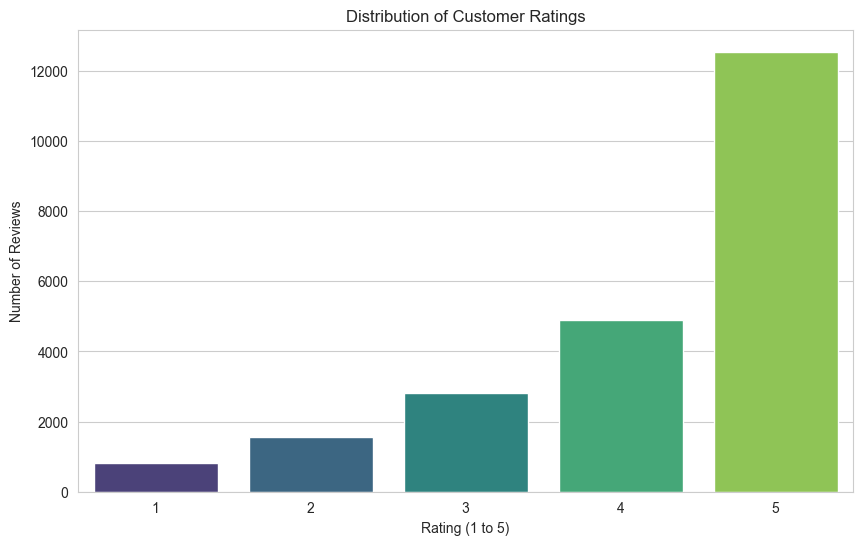

In [4]:
# ------------------
# STEP 3: EXPLORATORY ANALYSIS OF RATINGS
# ------------------

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.show()

In [5]:
# ------------------
# STEP 4: TEXT PREPROCESSING
# ------------------
import re # For regular expressions
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data (only needs to be done once)
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
    print("Done.")

# --- Define our text cleaning function ---
def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()
    
    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize the text (split into words)
    tokens = text.split()
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Stemming (reduce words to their root form)
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]
    # We will skip stemming for now to keep the text more readable, but it's a common step.
    
    # 6. Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# --- Apply the function to our 'Review Text' column ---
print("\nPreprocessing text data... (This may take a few seconds)")
# Create a new column for the cleaned text
df['Cleaned Review'] = df['Review Text'].apply(preprocess_text)
print("Preprocessing complete!")

# --- Display the results ---
print("\n--- Comparing Original vs. Cleaned Text ---")
# Set pandas to display full text
pd.set_option('display.max_colwidth', None)
display(df[['Review Text', 'Cleaned Review']].head())


Preprocessing text data... (This may take a few seconds)
Preprocessing complete!

--- Comparing Original vs. Cleaned Text ---


,Review Text,Cleaned Review
0,Absolutely wonderful - silky and sexy and comfortable,absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt


In [6]:
# ------------------
# STEP 5: FEATURE ENGINEERING & DATA PREPARATION
# ------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# --- 1. Define our Target Variable (Sentiment) ---
# We will create a new column 'Sentiment'. 
# Ratings 1 & 2 will be 'Negative' (0)
# Rating 3 will be 'Neutral' (1)
# Ratings 4 & 5 will be 'Positive' (2)
def assign_sentiment(rating):
    if rating <= 2:
        return 0 # Negative
    elif rating == 3:
        return 1 # Neutral
    else: # rating 4 or 5
        return 2 # Positive

df['Sentiment'] = df['Rating'].apply(assign_sentiment)

print("--- Sentiment Distribution ---")
print(df['Sentiment'].value_counts(normalize=True))


# --- 2. Define Features (X) and Target (y) ---
# Our feature is the cleaned text.
X = df['Cleaned Review']
# Our target is the sentiment we just created.
y = df['Sentiment']


# --- 3. Text Vectorization using TF-IDF ---
print("\nVectorizing text data with TF-IDF...")
# We will limit the number of features to 5000 to keep it manageable
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)
print("Vectorization complete!")
print(f"Shape of our new feature matrix (X_tfidf): {X_tfidf.shape}")


# --- 4. Split the data into Training and Testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' is VERY important here. It ensures that the proportion of positive/neutral/negative 
# is the same in both the training and testing sets, which is crucial for imbalanced data.

print("\nData splitting complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

--- Sentiment Distribution ---
Sentiment
2    0.770637
1    0.124685
0    0.104677
Name: proportion, dtype: float64

Vectorizing text data with TF-IDF...
Vectorization complete!
Shape of our new feature matrix (X_tfidf): (22641, 5000)

Data splitting complete.
Training data shape: (18112, 5000)
Test data shape: (4529, 5000)


In [12]:
# ------------------
# STEP 5.5: Handle Imbalanced Data using SMOTE
# ------------------
from imblearn.over_sampling import SMOTE
from collections import Counter

print("\nApplying SMOTE to balance the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nOriginal training data distribution:")
print(Counter(y_train))
print("Resampled training data distribution (after SMOTE):")
print(Counter(y_train_resampled))
print("SMOTE applied successfully!")

# تحديث المتغيرات التي ستستخدم للتدريب
# الموديل الآن سيتم تدريبه على هذه البيانات المعالجة بـ SMOTE
X_train = X_train_resampled
y_train = y_train_resampled


Applying SMOTE to balance the training data...


/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Original training data distribution:
Counter({2: 13958, 1: 2258, 0: 1896})
Resampled training data distribution (after SMOTE):
Counter({2: 13958, 1: 13958, 0: 13958})
SMOTE applied successfully!


Training the Logistic Regression model...
Model trained successfully!

--- Model Performance ---

Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.40      0.50       474
     Neutral       0.43      0.17      0.24       565
    Positive       0.85      0.98      0.91      3490

    accuracy                           0.82      4529
   macro avg       0.65      0.52      0.55      4529
weighted avg       0.78      0.82      0.79      4529


Confusion Matrix:


/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


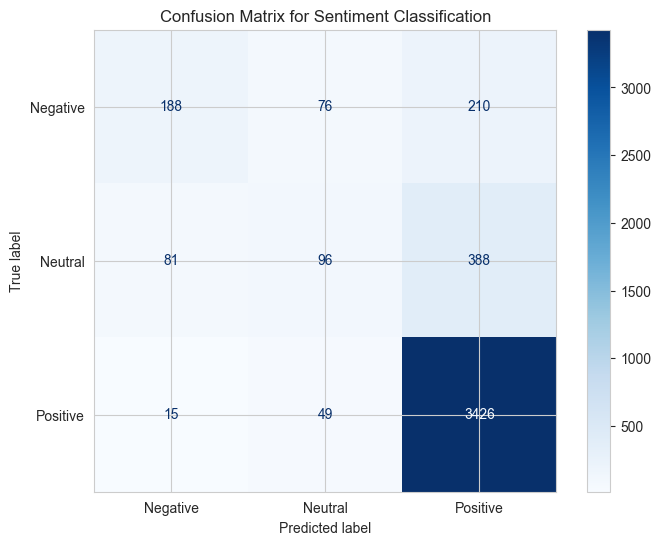

In [7]:
# ------------------
# STEP 6: MODEL TRAINING AND EVALUATION
# ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- 1. Train the Logistic Regression Model ---
print("Training the Logistic Regression model...")
# We use 'multi_class='ovr'' for problems with more than 2 classes
# 'solver='liblinear'' is a good choice for this type of problem
log_reg_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
log_reg_model.fit(X_train, y_train)
print("Model trained successfully!")


# --- 2. Make Predictions on the Test Set ---
y_pred = log_reg_model.predict(X_test)


# --- 3. Evaluate the Model ---
print("\n--- Model Performance ---")

# Print the Classification Report
# This is the most important output for this problem!
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Visualize the Confusion Matrix
print("\nConfusion Matrix:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, display_labels=['Negative', 'Neutral', 'Positive'], cmap='Blues')
plt.title('Confusion Matrix for Sentiment Classification')
plt.show()

In [8]:
import joblib

# حفظ أداة تحويل النصوص (Vectorizer)
joblib.dump(vectorizer, 'models/tfidf_vectorizer.joblib')

# حفظ موديل تحليل المشاعر (Classifier)
joblib.dump(log_reg_model, 'models/sentiment_classifier_model.joblib')

print("Vectorizer and Sentiment Model saved successfully!")

Vectorizer and Sentiment Model saved successfully!


In [9]:
# ------------------
# STEP 7: PREPARE DATA FOR BINARY CLASSIFICATION
# ------------------

# Create a new dataframe that excludes neutral reviews (Rating = 3)
df_binary = df[df['Rating'] != 3].copy() # .copy() prevents a SettingWithCopyWarning

# Create a new binary target variable: 1 for Positive, 0 for Negative
# Ratings 4 & 5 are Positive (1), Ratings 1 & 2 are Negative (0)
df_binary['Sentiment_Binary'] = df_binary['Rating'].apply(lambda rating: 1 if rating > 3 else 0)

print("--- New Binary Sentiment Distribution ---")
print(df_binary['Sentiment_Binary'].value_counts(normalize=True))

print(f"\nShape of the new binary dataframe: {df_binary.shape}")
display(df_binary[['Rating', 'Sentiment_Binary', 'Cleaned Review']].head())

--- New Binary Sentiment Distribution ---
Sentiment_Binary
1    0.880412
0    0.119588
Name: proportion, dtype: float64

Shape of the new binary dataframe: (19818, 13)


,Rating,Sentiment_Binary,Cleaned Review
0,4,1,absolutely wonderful silky sexy comfortable
1,5,1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite
3,5,1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
4,5,1,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt
5,2,0,love tracy reese dresses one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress


Training the BINARY Logistic Regression model...
Binary model trained successfully!

--- BINARY Model Performance ---

Classification Report (Binary):
              precision    recall  f1-score   support

    Negative       0.85      0.50      0.63       474
    Positive       0.94      0.99      0.96      3490

    accuracy                           0.93      3964
   macro avg       0.89      0.74      0.80      3964
weighted avg       0.93      0.93      0.92      3964


Confusion Matrix (Binary):


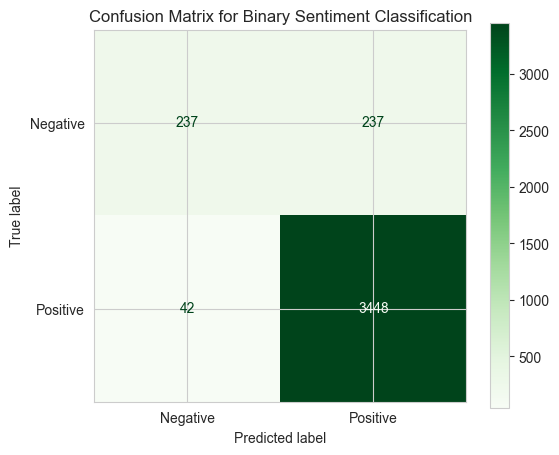

In [10]:
# ------------------
# STEP 8: RE-TRAIN AND EVALUATE THE BINARY MODEL
# ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- 1. Define New Features (X) and Target (y) ---
X_binary = df_binary['Cleaned Review']
y_binary = df_binary['Sentiment_Binary']

# --- 2. Vectorize Text Data (TF-IDF) ---
# We can reuse the same vectorizer settings
vectorizer_binary = TfidfVectorizer(max_features=5000)
X_tfidf_binary = vectorizer_binary.fit_transform(X_binary)

# --- 3. Split the Data ---
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_tfidf_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# --- 4. Train the new Logistic Regression Model ---
print("Training the BINARY Logistic Regression model...")
binary_model = LogisticRegression(solver='liblinear', random_state=42)
binary_model.fit(X_train_bin, y_train_bin)
print("Binary model trained successfully!")

# --- 5. Evaluate the Binary Model ---
y_pred_bin = binary_model.predict(X_test_bin)

print("\n--- BINARY Model Performance ---")
print("\nClassification Report (Binary):")
print(classification_report(y_test_bin, y_pred_bin, target_names=['Negative', 'Positive']))

print("\nConfusion Matrix (Binary):")
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_bin, ax=ax, display_labels=['Negative', 'Positive'], cmap='Greens')
plt.title('Confusion Matrix for Binary Sentiment Classification')
plt.show()